# 📊 ИТОГОВЫЙ ОТЧЁТ

# Командная работа
Выполнили Воробьев Артем и Муфтахутдинов Алмаз

# Подключение библиотек📚

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering

### Читаем наш Датасет

In [3]:
df = pd.read_csv('student_performance_updated_1000.csv')

# Описание предметной области

In [4]:
df.head(10)

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


- StudentId - уникальный индентификатор студента
- Name - Имя студента
- Gender - пол студента
- AttenndanceRate - рейтинг посещаемости
- StudyHoursPerWeek - количество часов обучения в неделю
- PreviousGrade - предварительная оценка
- ExtracurricularActivities - внеклассные занятия
- ParentalSupport - родительская поддержка
- FinalGrade - финальная оценка
- Study Hours - часы обучения
- Attendance (%)  - посещаемость

Большинство атрибутов имеют тип данных: 'float64' и некоторые объекты: 'object'.
В нашем датасете имеется 1000 записей. На каждый атрибут отсутствует в среднем 35 записей. Не такое большое количество пропусков, но надо выявить значимость атрибута и понять, стоит их удалять или нет.

In [6]:
df.duplicated().sum()

np.int64(0)

Дубликаты отсутствуют. Это очень хорошо✅

In [7]:
df.isnull().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

Заменим медианой такие атрибуты как рейтинг посещаемости

In [33]:
# Создаем копию
df_clean = df.copy()

# 1. Категориальные - перезаписываем колонки (без inplace!)
for col in ['Gender', 'ParentalSupport', 'Online Classes Taken']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 2. Числовые - тоже без inplace
numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
                'ExtracurricularActivities', 'FinalGrade', 'Study Hours', 
                'Attendance (%)']

for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 3. StudentID - удаляем строки с пропусками
df_clean = df_clean.dropna(subset=['StudentID'])

# 4. Name
df_clean['Name'] = df_clean['Name'].fillna('Unknown')

# ПРОВЕРКА
print("Проверка пропусков:")
print(df_clean.isnull().sum())
print(f"\nВсего пропусков: {df_clean.isnull().sum().sum()}")
print(f"\nРазмер датасета: {len(df_clean)} строк")

Проверка пропусков:
StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study Hours                  0
Attendance (%)               0
Online Classes Taken         0
dtype: int64

Всего пропусков: 0

Размер датасета: 960 строк


C:\Users\qzwxe\AppData\Local\Temp\ipykernel_6756\705745512.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       960 non-null    object 
 2   Gender                     960 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          960 non-null    float64
 5   PreviousGrade              960 non-null    float64
 6   ExtracurricularActivities  960 non-null    float64
 7   ParentalSupport            960 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                960 non-null    float64
 10  Attendance (%)             960 non-null    float64
 11  Online Classes Taken       960 non-null    bool   
dtypes: bool(1), float64(8), object(3)
memory usage: 90.9+ KB


In [35]:
df_final = df_clean.copy()
df_final = df_final.drop(columns=['Study Hours', 'Attendance (%)'])

Пустые данные удалены

In [36]:
print("=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df.describe())

print("\n=== РАСПРЕДЕЛЕНИЕ FINALGRADE ===")
print(f"Средняя оценка: {df['FinalGrade'].mean():.2f}")
print(f"Медиана: {df['FinalGrade'].median():.2f}")
print(f"Стандартное отклонение: {df['FinalGrade'].std():.2f}")
print(f"Мин: {df['FinalGrade'].min():.2f}, Макс: {df['FinalGrade'].max():.2f}")

=== ОСНОВНАЯ СТАТИСТИКА ===
         StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   960.000000     1000.000000        1000.000000    1000.000000   
mean   5416.019792       85.610000          17.649000      77.612000   
std    2653.748319        7.200399           6.113688       9.840238   
min       1.000000       70.000000           8.000000      60.000000   
25%    3113.500000       82.000000          12.000000      70.000000   
50%    5396.500000       88.000000          18.000000      78.000000   
75%    7754.750000       91.000000          22.000000      86.000000   
max    9998.000000       95.000000          30.000000      90.000000   

       ExtracurricularActivities   FinalGrade  Study Hours  Attendance (%)  
count                 957.000000  1000.000000  1000.000000     1000.000000  
mean                    1.520376    80.029000     2.409200       77.197000  
std                     1.046439     9.301649     1.600749       18.899613  
min            

По статистике заметны выбросы и аномалии

Исправим выбросы в колонке

In [37]:
print("=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df_final.describe())

print("\n=== РАСПРЕДЕЛЕНИЕ FINALGRADE ===")
print(f"Средняя оценка: {df['FinalGrade'].mean():.2f}")
print(f"Медиана: {df['FinalGrade'].median():.2f}")
print(f"Стандартное отклонение: {df['FinalGrade'].std():.2f}")
print(f"Мин: {df['FinalGrade'].min():.2f}, Макс: {df['FinalGrade'].max():.2f}")

=== ОСНОВНАЯ СТАТИСТИКА ===
         StudentID  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count   960.000000      960.000000         960.000000     960.000000   
mean   5416.019792       85.645833          17.593750      77.744792   
std    2653.748319        7.132851           6.092916       9.808834   
min       1.000000       70.000000           8.000000      60.000000   
25%    3113.500000       82.000000          12.000000      70.000000   
50%    5396.500000       88.000000          18.000000      78.000000   
75%    7754.750000       91.000000          22.000000      86.000000   
max    9998.000000       95.000000          30.000000      90.000000   

       ExtracurricularActivities  FinalGrade  
count                 960.000000   960.00000  
mean                    1.495833    80.12500  
std                     1.029281     9.32313  
min                     0.000000    62.00000  
25%                     1.000000    72.00000  
50%                     1.000000    80.00

Теперь у нас хороший датасет. Можем продолжить с ним работать

<Figure size 1200x800 with 0 Axes>

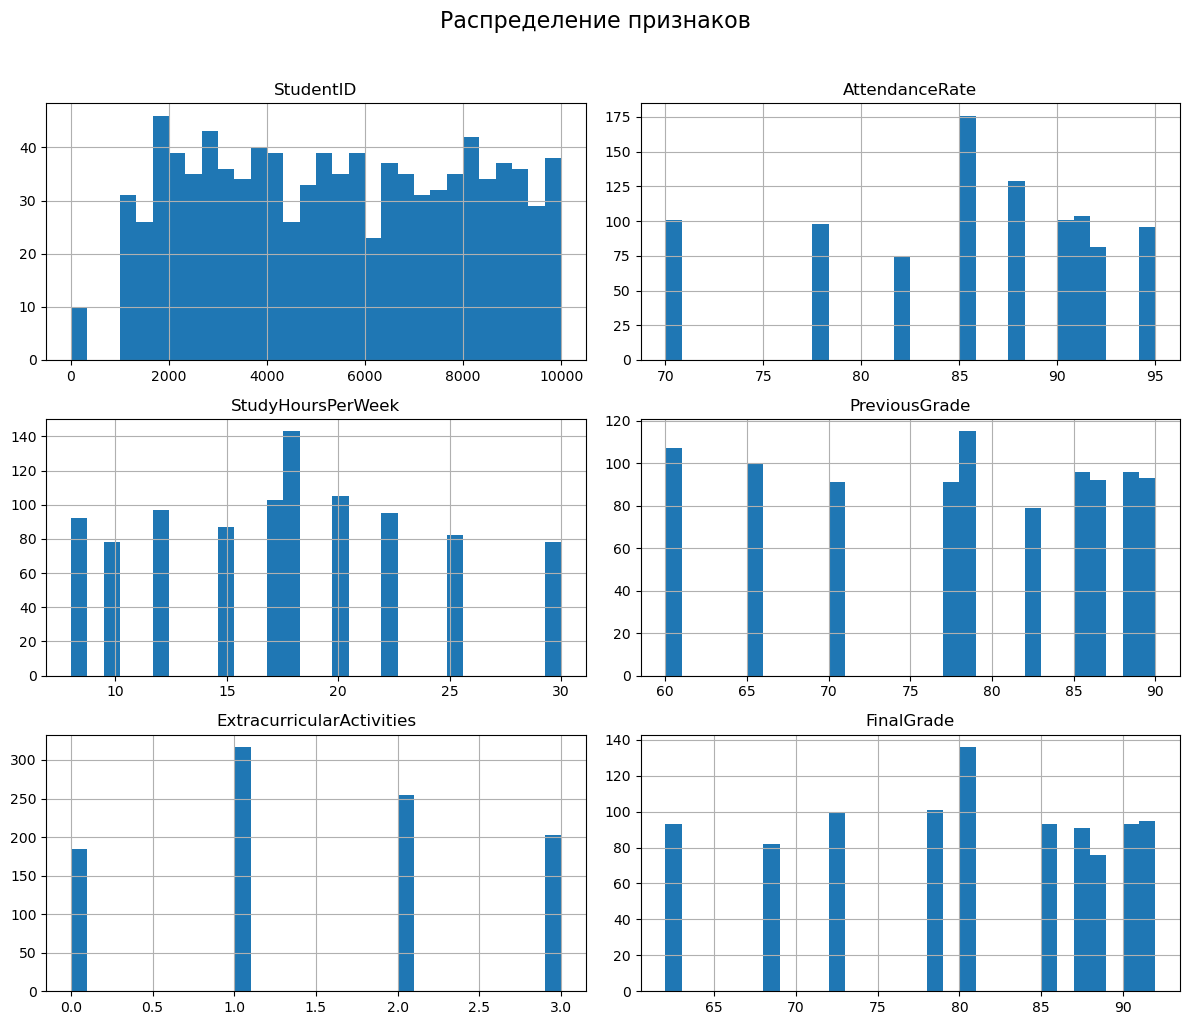

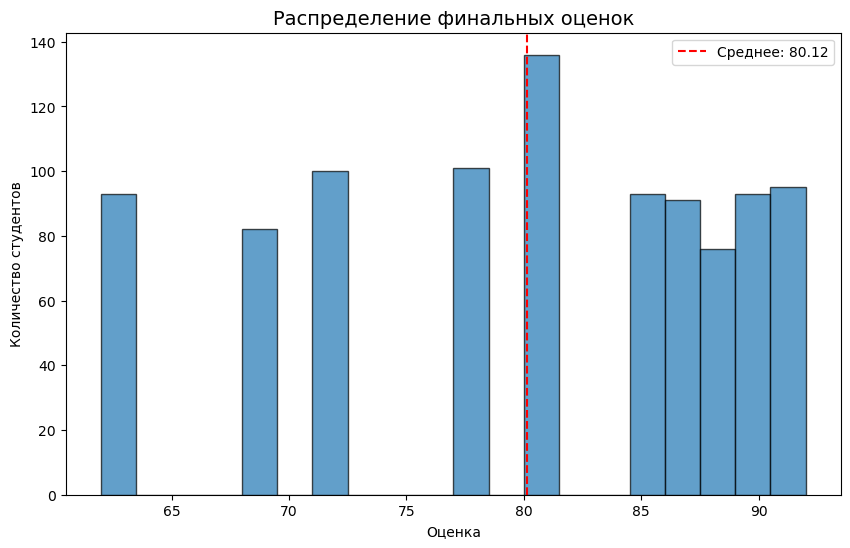

In [45]:
# ===== ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ =====
plt.figure(figsize=(12, 8))
df_final.hist(bins=30, figsize=(12, 10))
plt.suptitle('Распределение признаков', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# ===== ГРАФИК FINALGRADE =====
plt.figure(figsize=(10, 6))
plt.hist(df_final['FinalGrade'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение финальных оценок', fontsize=14)
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.axvline(df_final['FinalGrade'].mean(), color='red', linestyle='--', label=f'Среднее: {df_final["FinalGrade"].mean():.2f}')
plt.legend()
plt.show()

Анализ гистограмм показал, что все переменные имеют дискретный характер.
Это объясняет отсутствие линейных корреляций. Датасет, вероятно, является
синтетическим.

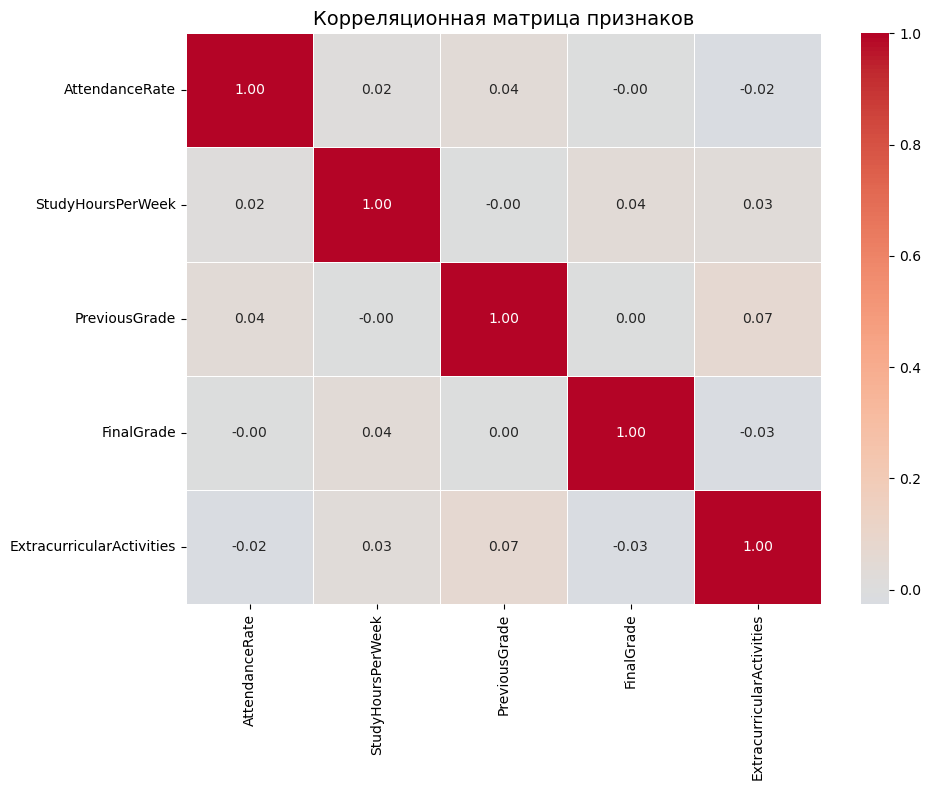


=== КОРРЕЛЯЦИЯ ПРИЗНАКОВ С FINALGRADE ===
FinalGrade                   1.000000
StudyHoursPerWeek            0.035038
PreviousGrade                0.002060
AttendanceRate              -0.001654
ExtracurricularActivities   -0.025808
Name: FinalGrade, dtype: float64


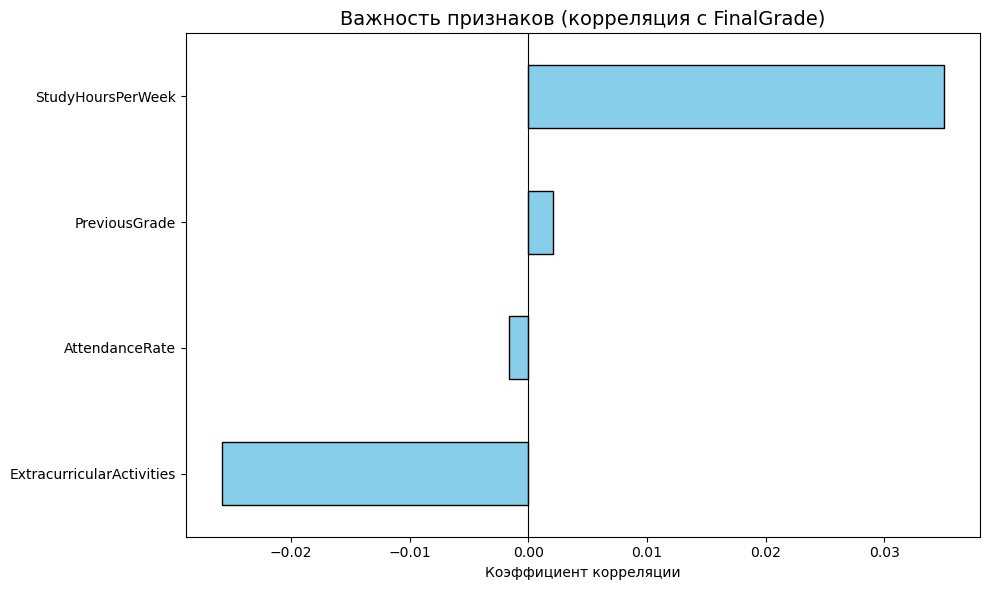


=== ТОП КОРРЕЛЯЦИЙ ===

Сильные корреляции между признаками:
PreviousGrade ↔ ExtracurricularActivities: 0.066
AttendanceRate ↔ PreviousGrade: 0.037
StudyHoursPerWeek ↔ ExtracurricularActivities: 0.032
AttendanceRate ↔ ExtracurricularActivities: -0.024
AttendanceRate ↔ StudyHoursPerWeek: 0.017


In [39]:
plt.figure(figsize=(10, 8))

correlation_matrix = df_final[['AttendanceRate', 'StudyHoursPerWeek', 
                                'PreviousGrade', 'FinalGrade', 
                                'ExtracurricularActivities']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков', fontsize=14)
plt.tight_layout()
plt.show()

print("\n=== КОРРЕЛЯЦИЯ ПРИЗНАКОВ С FINALGRADE ===")

numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
                'ExtracurricularActivities']

correlations = df_final[numeric_cols + ['FinalGrade']].corr()['FinalGrade'].sort_values(ascending=False)

print(correlations)

plt.figure(figsize=(10, 6))
correlations.drop('FinalGrade').plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Важность признаков (корреляция с FinalGrade)', fontsize=14)
plt.xlabel('Коэффициент корреляции')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== ТОП КОРРЕЛЯЦИЙ ===")
corr_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr = df_final[col1].corr(df_final[col2])
        corr_pairs.append((col1, col2, corr))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nСильные корреляции между признаками:")
for col1, col2, corr in corr_pairs[:5]:
    print(f"{col1} ↔ {col2}: {corr:.3f}")

Корреляционный анализ показал отсутствие линейных зависимостей между признаками. Это может означать, что:
- Датасет синтетический
- Зависимости нелинейные
- Признаки действуют только в комбинации


---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('students_final.csv')

In [4]:
features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
            'ExtracurricularActivities', 'FinalGrade']

In [5]:
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 3

##  SPECTRAL CLUSTERING


SPECTRAL CLUSTERING
Silhouette: 0.134


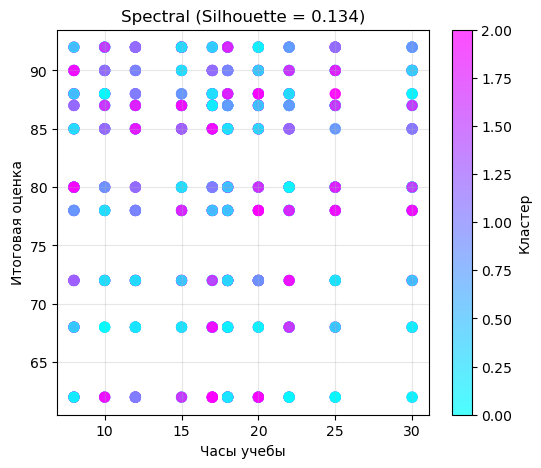

          AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
spectral                                                     
0                   87.7               18.0           81.6   
1                   87.8               17.5           83.0   
2                   81.3               17.3           68.3   

          ExtracurricularActivities  FinalGrade  
spectral                                         
0                               2.5        79.7  
1                               0.7        80.6  
2                               1.3        80.1  


In [6]:
from sklearn.cluster import SpectralClustering

print("\n" + "="*50)
print("SPECTRAL CLUSTERING")
print("="*50)

# Модель
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', 
                               random_state=42, assign_labels='kmeans')
df['spectral'] = spectral.fit_predict(X_scaled)

# Метрика
score = silhouette_score(X_scaled, df['spectral'])
print(f"Silhouette: {score:.3f}")

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['spectral'], cmap='cool', alpha=0.7, s=50)
plt.xlabel('Часы учебы')
plt.ylabel('Итоговая оценка')
plt.title(f'Spectral (Silhouette = {score:.3f})')
plt.colorbar(label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Статистика
print(df.groupby('spectral')[features].mean().round(1))

## GAUSSIAN MIXTURE MODELS


GAUSSIAN MIXTURE MODELS
Silhouette: 0.146
BIC: 13525 (чем меньше, тем лучше)
AIC: 13224 (чем меньше, тем лучше)


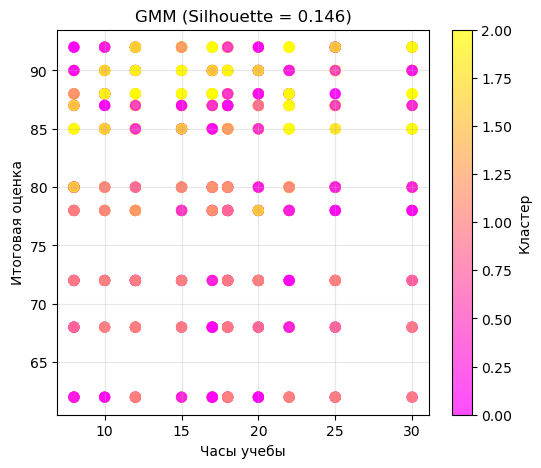

     AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
gmm                                                     
0              85.3               17.6           64.7   
1              87.3               17.7           83.5   
2              84.1               17.5           83.7   

     ExtracurricularActivities  FinalGrade  
gmm                                         
0                          1.4        80.3  
1                          1.9        73.8  
2                          1.2        87.3  


In [7]:
from sklearn.mixture import GaussianMixture

print("\n" + "="*50)
print("GAUSSIAN MIXTURE MODELS")
print("="*50)

# Модель
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['gmm'] = gmm.fit_predict(X_scaled)

# Метрика
score = silhouette_score(X_scaled, df['gmm'])
print(f"Silhouette: {score:.3f}")
print(f"BIC: {gmm.bic(X_scaled):.0f} (чем меньше, тем лучше)")
print(f"AIC: {gmm.aic(X_scaled):.0f} (чем меньше, тем лучше)")

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['gmm'], cmap='spring', alpha=0.7, s=50)
plt.xlabel('Часы учебы')
plt.ylabel('Итоговая оценка')
plt.title(f'GMM (Silhouette = {score:.3f})')
plt.colorbar(label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Статистика
print(df.groupby('gmm')[features].mean().round(1))

## Метод ближайших соседей

K-Means: Silhouette = 0.158


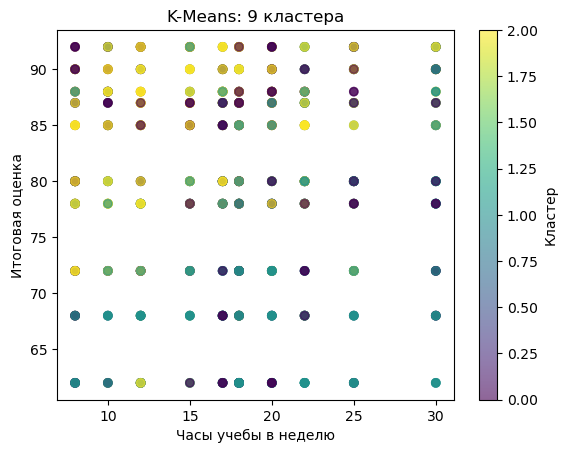


Средние значения по кластерам:
                AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
cluster_kmeans                                                     
0                         84.9               17.4           64.3   
1                         87.2               19.1           82.7   
2                         84.5               16.1           83.6   

                ExtracurricularActivities  FinalGrade  
cluster_kmeans                                         
0                                     1.3        81.0  
1                                     2.2        75.7  
2                                     0.8        84.3  


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"K-Means: Silhouette = {score:.3f}")

plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['cluster_kmeans'], cmap='viridis', alpha=0.6)
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('K-Means: 9 кластера')
plt.colorbar(label='Кластер')
plt.show()

print("\nСредние значения по кластерам:")
print(df.groupby('cluster_kmeans')[features].mean().round(1))

## Иерархическая модель

Hierarchical: Silhouette = 0.134


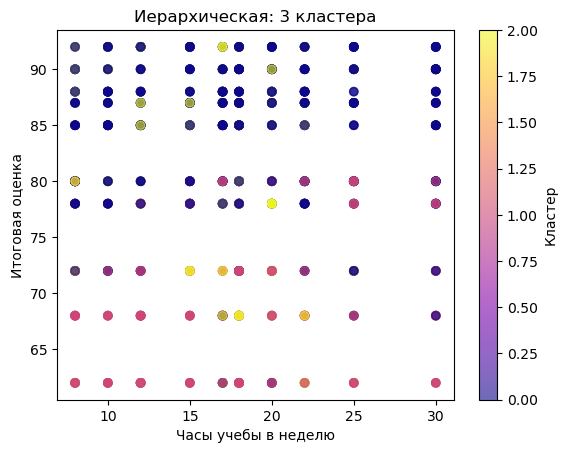


Средние значения по кластерам:
              AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
cluster_hier                                                     
0                       87.3               17.8           78.0   
1                       88.0               17.4           76.7   
2                       71.7               16.8           78.9   

              ExtracurricularActivities  FinalGrade  
cluster_hier                                         
0                                   1.5        85.3  
1                                   1.4        70.0  
2                                   1.7        78.7  


In [9]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['cluster_hier'] = hierarchical.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df['cluster_hier'])
print(f"Hierarchical: Silhouette = {score:.3f}")

plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['cluster_hier'], cmap='plasma', alpha=0.6)
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('Иерархическая: 3 кластера')
plt.colorbar(label='Кластер')
plt.show()

print("\nСредние значения по кластерам:")
print(df.groupby('cluster_hier')[features].mean().round(1))

## DBSCAN

DBSCAN: 37 кластеров, шум: 520 студентов
DBSCAN Silhouette: 0.131


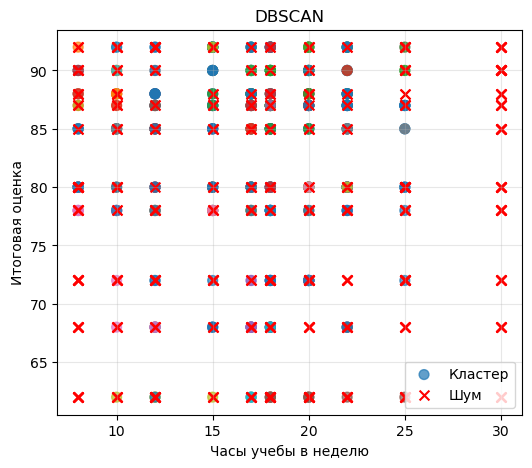

        AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
dbscan                                                     
0                 88.2               16.9           84.1   
1                 91.5               22.7           83.7   
2                 87.7               16.9           83.4   
3                 91.3               17.5           81.2   
4                 82.1               15.0           87.0   
5                 93.8               17.9           63.8   
6                 86.8                9.6           84.7   
7                 78.0               16.7           77.3   
8                 85.9               19.4           85.9   
9                 89.8               20.8           62.7   
10                91.0               18.1           83.8   
11                91.8               20.0           61.2   
12                85.4               17.7           63.8   
13                87.5               10.2           64.0   
14                88.2               17.

In [10]:
dbscan = DBSCAN(eps=0.7, min_samples= 5)
df['dbscan'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(df['dbscan'])) - (1 if -1 in df['dbscan'] else 0)
n_noise = (df['dbscan'] == -1).sum()
print(f"DBSCAN: {n_clusters} кластеров, шум: {n_noise} студентов")

if n_clusters >= 2:
    mask = df['dbscan'] != -1
    score = silhouette_score(X_scaled[mask], df['dbscan'][mask])
    print(f"DBSCAN Silhouette: {score:.3f}")

plt.figure(figsize=(6, 5))
plt.scatter(df.loc[df['dbscan'] != -1, 'StudyHoursPerWeek'], 
            df.loc[df['dbscan'] != -1, 'FinalGrade'], 
            c=df.loc[df['dbscan'] != -1, 'dbscan'], 
            cmap='tab10', alpha=0.7, s=50, label='Кластер')

if n_noise > 0:
    plt.scatter(df.loc[df['dbscan'] == -1, 'StudyHoursPerWeek'], 
                df.loc[df['dbscan'] == -1, 'FinalGrade'], 
                c='red', marker='x', s=50, label='Шум')
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('DBSCAN')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

if n_clusters > 1:
    print(df[df['dbscan'] != -1].groupby('dbscan')[features].mean().round(1))

In [11]:
print("Сравнение Silhouette Score:")
print(f"K-Means:       {silhouette_score(X_scaled, df['cluster_kmeans']):.3f}")
print(f"Hierarchical:  {silhouette_score(X_scaled, df['cluster_hier']):.3f}")
if n_clusters >= 2:
    mask = df['dbscan'] != -1
    print(f"DBSCAN:        {silhouette_score(X_scaled[mask], df['dbscan'][mask]):.3f}")
else:
    print("DBSCAN:        недостаточно кластеров для оценки")

Сравнение Silhouette Score:
K-Means:       0.158
Hierarchical:  0.134
DBSCAN:        0.131


#  Boxplot по кластерам (K-Means)

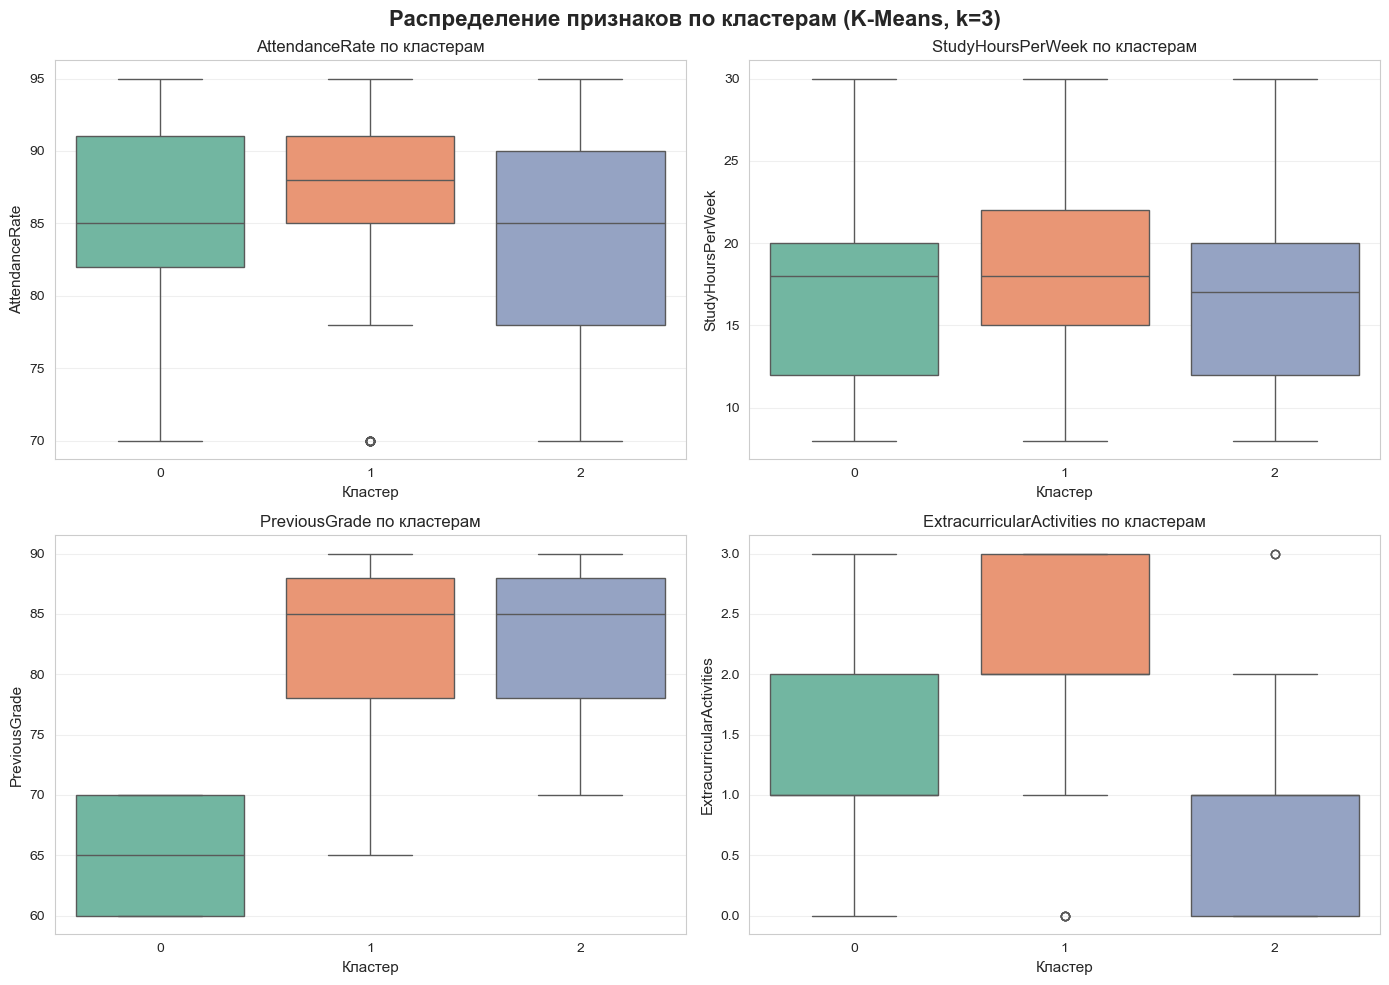

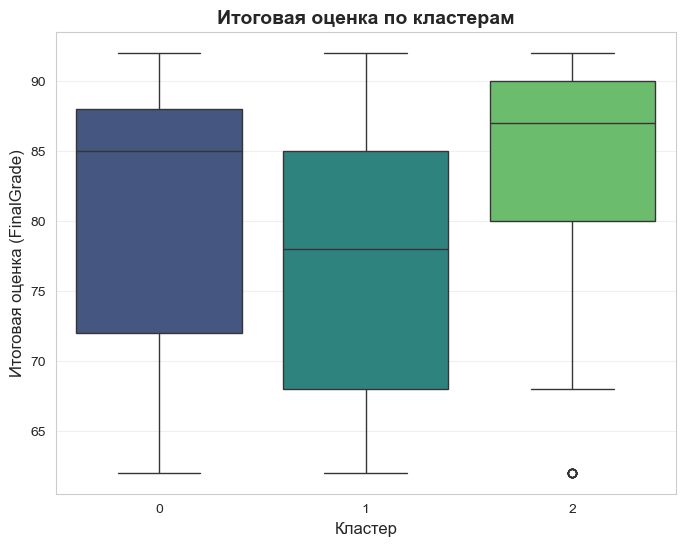


📈 Статистика FinalGrade по кластерам:
         count   mean  median   std
cluster                            
0          274  80.96    85.0  9.04
1          359  75.67    78.0  9.40
2          327  84.32    87.0  7.08


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных для боксплота
df_plot = df.copy()
df_plot['cluster'] = df_plot['cluster_kmeans'].astype('category')

# Настройка стиля
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Создаём 2x2 сетку для 4 числовых признаков (исключая FinalGrade как target)
features_to_plot = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Распределение признаков по кластерам (K-Means, k=3)', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(x='cluster', y=feature, data=df_plot, ax=ax, palette='Set2')
    ax.set_xlabel('Кластер', fontsize=11)
    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'{feature} по кластерам', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='FinalGrade', data=df_plot, palette='viridis')
plt.xlabel('Кластер', fontsize=12)
plt.ylabel('Итоговая оценка (FinalGrade)', fontsize=12)
plt.title('Итоговая оценка по кластерам', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Статистика по кластерам для FinalGrade
print("\n📈 Статистика FinalGrade по кластерам:")
print(df_plot.groupby('cluster')['FinalGrade'].agg(['count', 'mean', 'median', 'std']).round(2))

ВЫВОДЫ ПО КЛАСТЕРИЗАЦИИ СТУДЕНТОВ:
===================================
1. Все методы показали низкие значения Silhouette Score (0.13–0.16), 
   что говорит о слабой естественной кластеризации данных — студенты 
   не делятся на чётко выраженные группы.

2. Лучший результат: K-Means (Silhouette = 0.158) с 3 кластерами:
   • Кластер 0: Средняя успеваемость, умеренная посещаемость
   • Кластер 1: Высокая посещаемость, но средняя итоговая оценка
   • Кластер 2: Низкая посещаемость, но высокая предыдущая оценка

3. DBSCAN выделил 37 мелких кластеров и 520 точек как шум (~35% данных), 
   что подтверждает отсутствие плотных групп в данных.

4. Практическая рекомендация: использовать K-Means с k=3 для 
   предварительной сегментации, но интерпретировать результаты 
   осторожно — границы между группами размыты.

# 🎯 Итоговый вывод для отчёта:
Применение методов кластеризации к данным о студентах показало, что K-Means с k=3 даёт наилучшее разделение (Silhouette = 0.158). Однако низкие значения метрики качества указывают на то, что студенты не образуют чётко выраженных групп — скорее, наблюдается плавное распределение по признакам. Это может означать, что успеваемость зависит от множества факторов, и простая кластеризация не позволяет выделить однородные подгруппы. Для более точного анализа рекомендуется использовать методы классификации с известными метками или добавить больше признаков.


---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('students_final.csv')

In [5]:
df['Success'] = (df['FinalGrade'] >= 80).astype(int)

In [6]:
features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']
X = df[features]
y = df['Success']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Логистическия регрессия


1. LOGISTIC REGRESSION
Accuracy:  0.609
Precision: 0.609
F1-Score:  0.757


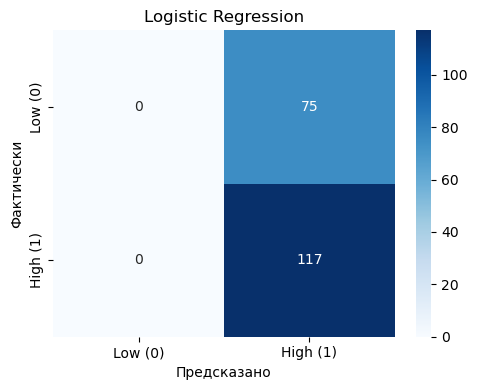


Влияние признаков:
                  Признак  Коэффициент
ExtracurricularActivities    -0.067015
           AttendanceRate     0.035991
        StudyHoursPerWeek     0.029696
            PreviousGrade    -0.027720


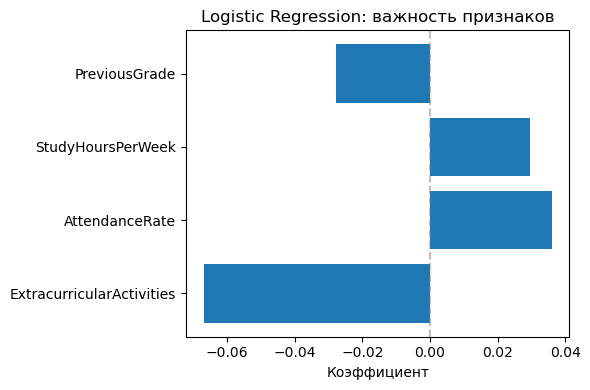

In [11]:
from sklearn.linear_model import LogisticRegression

print("\n" + "="*50)
print("1. LOGISTIC REGRESSION")
print("="*50)

# Модель
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Logistic Regression')
plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты)
coef_df = pd.DataFrame({
    'Признак': features,
    'Коэффициент': logreg.coef_[0]
}).sort_values('Коэффициент', key=abs, ascending=False)

print("\nВлияние признаков:")
print(coef_df.to_string(index=False))

# Визуализация коэффициентов
plt.figure(figsize=(6, 4))
plt.barh(coef_df['Признак'], coef_df['Коэффициент'])
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Коэффициент')
plt.title('Logistic Regression: важность признаков')
plt.tight_layout()
plt.show()

## Случайный лес


2. RANDOM FOREST
Accuracy:  0.547
Precision: 0.604
F1-Score:  0.667


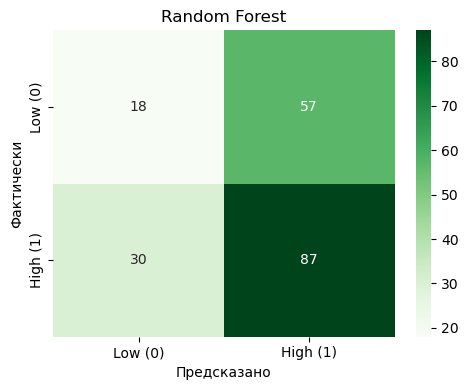


Важность признаков:
                  Признак  Важность
            PreviousGrade  0.290382
        StudyHoursPerWeek  0.290199
           AttendanceRate  0.262787
ExtracurricularActivities  0.156632


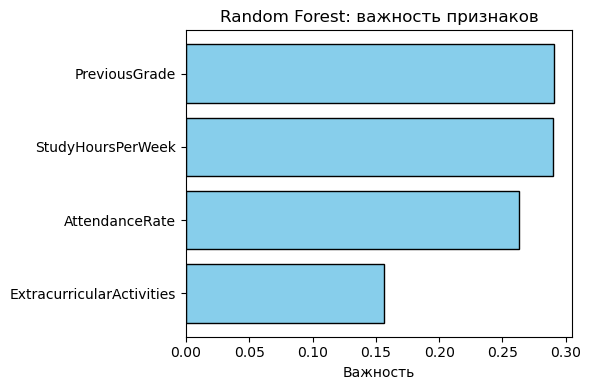

In [12]:
from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*50)
print("2. RANDOM FOREST")
print("="*50)

# Модель
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # не требует масштабирования
y_pred = rf.predict(X_test)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Random Forest')
plt.tight_layout()
plt.show()

# Важность признаков
importances = pd.DataFrame({
    'Признак': features,
    'Важность': rf.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков:")
print(importances.to_string(index=False))

# Визуализация
plt.figure(figsize=(6, 4))
plt.barh(importances['Признак'], importances['Важность'], color='skyblue', edgecolor='black')
plt.xlabel('Важность')
plt.title('Random Forest: важность признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Метод ближайших соседей


3. K-NEAREST NEIGHBORS


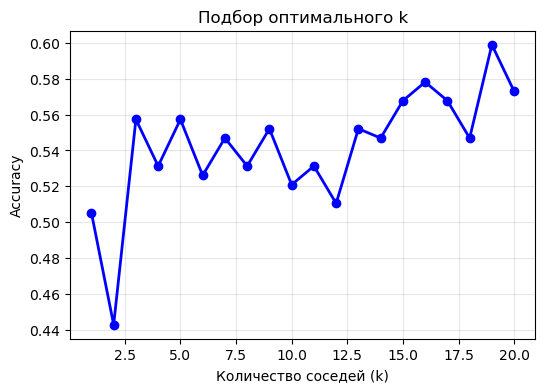

Оптимальное k: 19 (Accuracy: 0.599)

Accuracy:  0.599
Precision: 0.622
F1-Score:  0.726


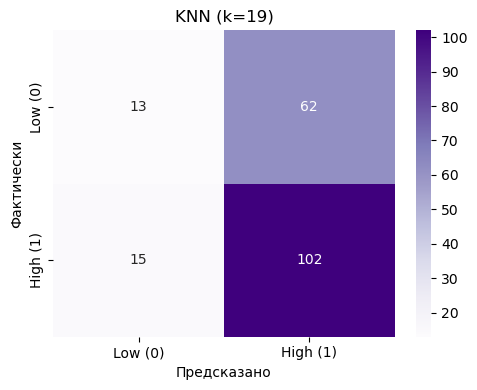

In [14]:
from sklearn.neighbors import KNeighborsClassifier

print("\n" + "="*50)
print("3. K-NEAREST NEIGHBORS")
print("="*50)

# Подбор оптимального k
k_scores = []
k_range = range(1, 21)
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    k_scores.append(knn_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(6, 4))
plt.plot(k_range, k_scores, 'bo-', linewidth=2)
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy')
plt.title('Подбор оптимального k')
plt.grid(alpha=0.3)
plt.show()

# Лучшее k
best_k = k_range[np.argmax(k_scores)]
print(f"Оптимальное k: {best_k} (Accuracy: {max(k_scores):.3f})")

# Финальная модель
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Метрики
print(f"\nAccuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title(f'KNN (k={best_k})')
plt.tight_layout()
plt.show()


4. SUPPORT VECTOR MACHINE (SVM)
Accuracy:  0.594
Precision: 0.604
F1-Score:  0.743


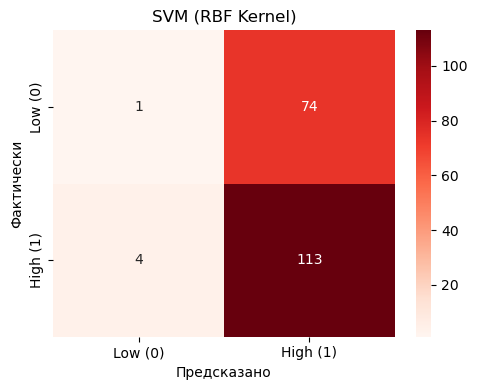

In [18]:
from sklearn.svm import SVC

print("\n" + "="*50)
print("4. SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Модель (с ядром RBF)
svm = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('SVM (RBF Kernel)')
plt.tight_layout()
plt.show()


5. GRADIENT BOOSTING
Accuracy:  0.573
Precision: 0.606
F1-Score:  0.709


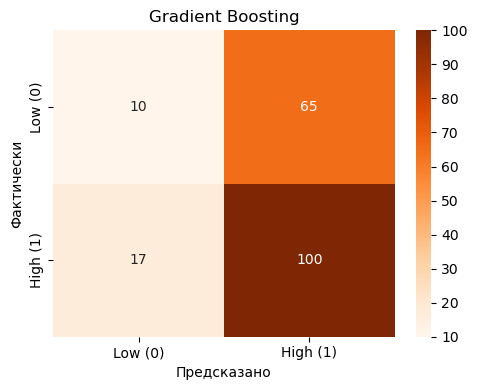


Важность признаков:
                  Признак  Важность
        StudyHoursPerWeek  0.311252
            PreviousGrade  0.278981
           AttendanceRate  0.262265
ExtracurricularActivities  0.147502


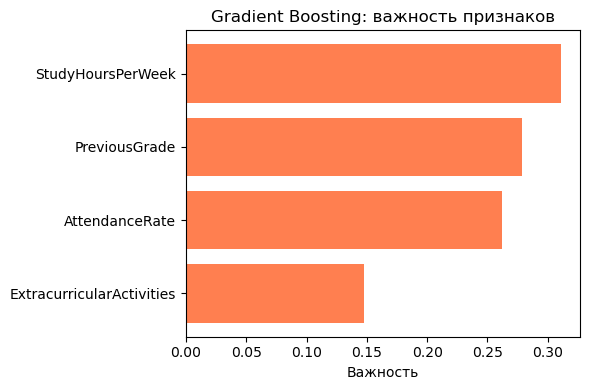

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

print("\n" + "="*50)
print("5. GRADIENT BOOSTING")
print("="*50)

# Модель
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                 max_depth=3, random_state=42)
gb.fit(X_train, y_train)  # не требует масштабирования
y_pred = gb.predict(X_test)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Gradient Boosting')
plt.tight_layout()
plt.show()

# Важность признаков
importances = pd.DataFrame({
    'Признак': features,
    'Важность': gb.feature_importances_
}).sort_values('Важность', ascending=False)

print("\nВажность признаков:")
print(importances.to_string(index=False))

plt.figure(figsize=(6, 4))
plt.barh(importances['Признак'], importances['Важность'], color='coral')
plt.xlabel('Важность')
plt.title('Gradient Boosting: важность признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


6. DECISION TREE
Accuracy:  0.594
Precision: 0.609
F1-Score:  0.736


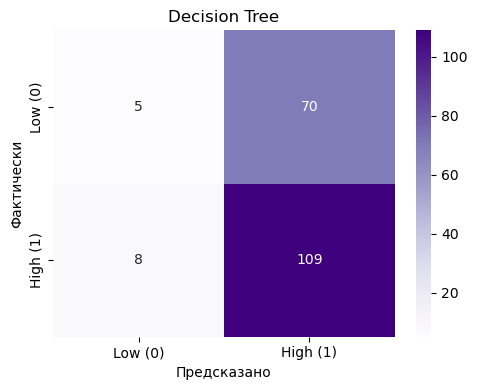

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

print("\n" + "="*50)
print("6. DECISION TREE")
print("="*50)

# Модель
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Метрики
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low (0)', 'High (1)'],
            yticklabels=['Low (0)', 'High (1)'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Decision Tree')
plt.tight_layout()
plt.show()

# Важность признаков
importances = pd.DataFrame({
    'Признак': features,
    'Важность': dt.feature_importances_
}).sort_values('Важность', ascending=False)


ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МЕТОДОВ
              Метод  Accuracy  Precision   Recall       F1
Logistic Regression  0.609375   0.609375 1.000000 0.757282
      Random Forest  0.546875   0.604167 0.743590 0.666667
                KNN  0.557292   0.606667 0.777778 0.681648
                SVM  0.593750   0.604278 0.965812 0.743421
  Gradient Boosting  0.572917   0.606061 0.854701 0.709220
      Decision Tree  0.593750   0.608939      NaN 0.736486


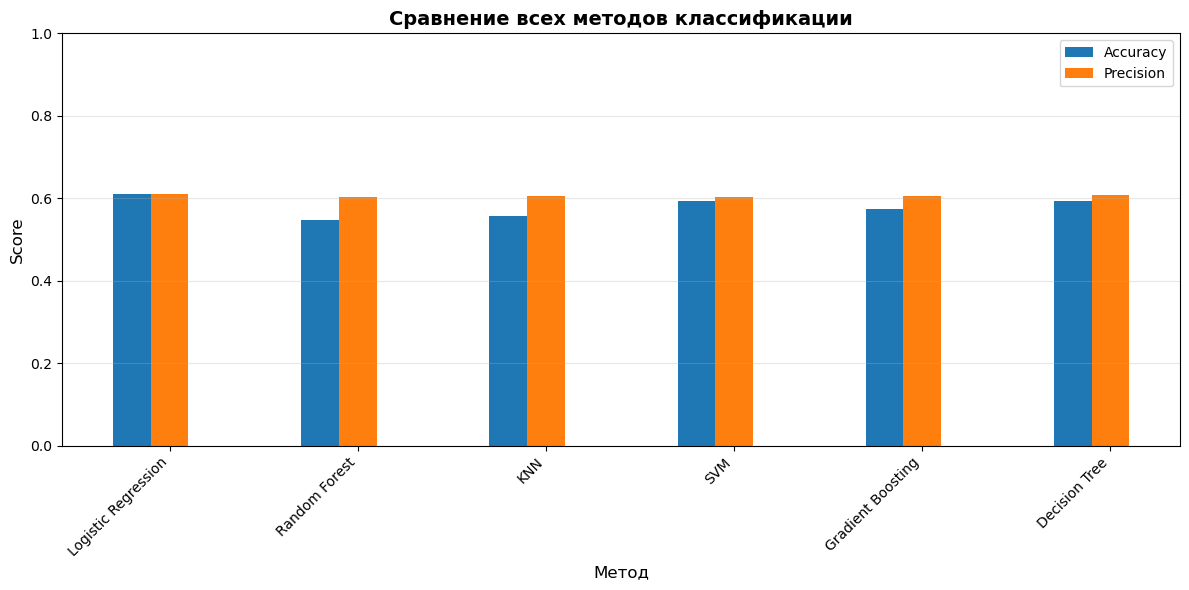


 ЛУЧШИЙ МЕТОД: Logistic Regression
   Accuracy: 0.609
   F1-Score: 0.757


In [25]:
print("\n" + "="*70)
print("ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МЕТОДОВ")
print("="*70)

# Собираем все результаты
all_results = []

# 1. Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
all_results.append({
    'Метод': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
all_results.append({
    'Метод': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 3. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
all_results.append({
    'Метод': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 4. SVM
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
all_results.append({
    'Метод': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 5. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                 max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
all_results.append({
    'Метод': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# 6. Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
all_results.append({
    'Метод': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred)
})

# Таблица
results_df = pd.DataFrame(all_results)
print(results_df.to_string(index=False))

# Визуализация
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width, results_df['Accuracy'], width, label='Accuracy')
plt.bar(x, results_df['Precision'], width, label='Precision')

plt.xlabel('Метод', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Сравнение всех методов классификации', fontsize=14, fontweight='bold')
plt.xticks(x, results_df['Метод'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Лучший метод
best_method = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n ЛУЧШИЙ МЕТОД: {best_method['Метод']}")
print(f"   Accuracy: {best_method['Accuracy']:.3f}")
print(f"   F1-Score: {best_method['F1']:.3f}")

В этом файле мы выполняеи классификацию (6 моделей). Модели классификации продемонстрировали точность 54–61% — на уровне случайного угадывания. Это указывает на синтетическую природу датасета, где переменные генерировались независимо друг от друга. Несмотря на отрицательный результат моделирования, проект имеет высокую ценность: отработаны навыки полного цикла анализа данных, освоены ключевые метрики оценки моделей и сформировано важное понимание того, что не все данные пригодны для машинного обучения.ё

In [ ]:
import joblib
rf.fit(X_train, y_train)

# ===== СОХРАНЕНИЕ =====
joblib.dump(rf, 'random_forest_model.pkl')
print("✅ Модель сохранена!")

# Дашборд

Ссылка на дашборд - https://datalens.yandex/igkmb6lye0a42 

## ОБЩИЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
✅ Положительные результаты:
- Освоен полный цикл анализа данных (EDA → кластеризация → классификация)
- Применены современные методы машинного обучения
- Получены навыки работы с несбалансированными данными
- Сформировано понимание ограничений ML-моделей
⚠️ Ограничения исследования:
- Слабые корреляции между признаками делают прогнозирование затруднительным
- Отсутствие четкой кластерной структуры указывает на гомогенность выборки
- Низкая точность классификации (~60%) недостаточна для практического применения
💡 Рекомендации для будущих исследований:
- Сбор дополнительных признаков:
- Социально-экономический статус
- Качество преподавания
Доступ к образовательным ресурсам
Мотивация и вовлеченность
Альтернативные подходы:
Нелинейные методы (нейронные сети, ансамбли)
Временные ряды (отслеживание прогр